# Practical 9

### Logistic Regression

🎯 Up until now, you have been modeling a regression task. This time, you are going to be modeling a classification task, on the famous Titanic dataset.

Import the `titanic_dataset.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


```markdown
Variable    Definition      Key

survival    Survival        0 = No, 1 = Yes
pclass      Ticket class    1 = 1st, 2 = 2nd, 3 = 3rd
sex         Sex
Age         Age in years
sibsp       # of siblings / spouses aboard the Titanic
parch       # of parents / children aboard the Titanic
ticket      Ticket number
fare        Passenger fare
cabin       Cabin number
embarked    Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
```

# 1. Model evaluation

👇 We want to predict whether a passenger survived (`Survived`) the Titanic disaster, according to the following features:

- The class in which she/he was travelling (`Pclass`)
- The number of siblings/spouses he had onboard (`SibSp`)
- The number of parents/children he had onboard (`Parch`)
- The fare he paid for the ticket (`Fare`)

❓How accurate would a [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model be at such a task? Cross-validate the model and save the mean accuracy under variable name `accuracy`.

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

# Create the feature set
X = df[['Pclass', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']


# Instanciate model
model = LogisticRegression()

# 5-Fold Cross validate model
cv_results = cross_validate(model, X, y, cv=5, scoring='accuracy')

# Mean of accuracies
accuracy = cv_results['test_score'].mean()
accuracy

np.float64(0.6835791852363318)

# 2. In-depth diagnosis

❓ We've evaluated the accuracy of the model at predicting, but we want to investigate its performance in more depth. Is the model overfitting? Underfitting? How many learning examples does it need to learn optimally on the given features?

<br/>

 ℹ️ What do we want? 
    
We want learning curves.



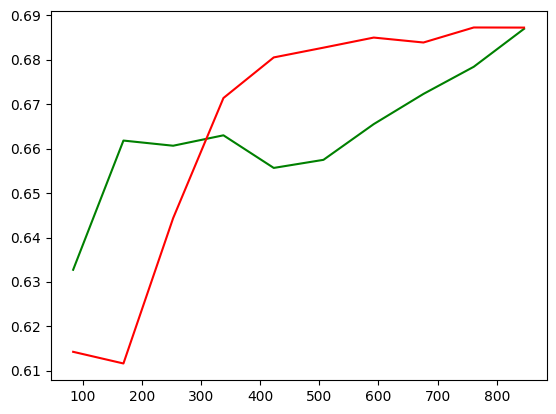

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Get train scores, train sizes, and validation scores using `learning_curve`, r2 score
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=20, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = train_scores.mean(axis=1)
test_scores_mean = test_scores.mean(axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, color='green')
plt.plot(train_sizes, test_scores_mean, color='red')



<summary> ℹ️ Once you have completed your diagnosis, unfold this cell for our interpretation </summary>   
    
<br/>
You should have plotted the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html">learning curves</a>.

👉 The curves should have converged:
- The model is not overfitting (no variance): it generalizes well.

👉 The test score stops increasing around 500 training observations:
- The model does not need more than 500 training observations to perform optimally on the given features.
    

# 3. Reduced training size

👇 Evaluate a model on the training size suggested by the curves. Are you able to maintain a similar accuracy? Save the new accuracy under variable name `reduced_training_accuracy`

In [3]:
# Create the reduced feature set and target


# 5-Fold Cross validate model


# Mean of accuracies



ℹ️ The accuracy should be nearly the same, with a reduced computational expense.

# 4. Predictions

❓ Did the following person survive the Titanic disaster?

- Travelled in class 1 (`Pclass`)
- Had no spouse or siblings on board(`SibSp`)
- Had no parents or children on board (`Parch`)
- Paid 15 for his ticket (`Fare`)

⚠️ Create and fit a new model (remember, `cross_validate` doesn't return a fitted model).
 Save the prediction under variable name `prediction`.

In [4]:
# Import the model


# Instanciate the model


# Train the model on the training data

# Use the trained model to predict


❓ What is the probability that the person survived? Compute your answer and save it under variable name `probability`.

💡 Hint

To return the predicted probabilities from a fitted sklearn Classifier, have a look at the method `.predict_proba()`


In [5]:
# Access probability of class 1 in model attributes
